# Análisis de filtros

En este cuaderno veremos cómo :

* Dados los coeficientes de un filtro

  * Determinar el tipo de filtro que es: paso-bajo, paso-banda, ...
  
  * Determinar el límite de la banda de paso, es decir el margen de frecuencias donde la atenuación es inferior a una tolerancia en dB.
  
  * Determinar el límite de la banda atenuada, es decir el margen de frecuencias donde la atenuación es mayor que un cierto valor mínimo.




In [1]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math
import cmath

import warnings
warnings.filterwarnings('ignore')


## Carga de los coeficientes del filtro a analizar

In [5]:
coeficientes=np.load('TareaAnalisis.npz')
A=coeficientes['A']
B=coeficientes['B']
print('B=',B)
print('A=',A)

B= [ 4.82945079e-05  0.00000000e+00 -3.86356063e-04  0.00000000e+00
  1.35224622e-03  0.00000000e+00 -2.70449244e-03  0.00000000e+00
  3.38061555e-03  0.00000000e+00 -2.70449244e-03  0.00000000e+00
  1.35224622e-03  0.00000000e+00 -3.86356063e-04  0.00000000e+00
  4.82945079e-05]
A= [ 1.00000000e+00 -5.93969318e-15  5.25653499e+00 -2.79776202e-14
  1.35752852e+01 -7.14983628e-14  2.20152574e+01 -1.10134124e-13
  2.43002923e+01 -1.04805054e-13  1.86182107e+01 -4.44089210e-14
  9.66552829e+00 -1.59872116e-14  3.11856669e+00 -3.27515792e-15
  4.83028581e-01]


## Dibujo de la respuesta en frecuencia
Dibujar el módulo de la respuesta en frecuencia en escala lineal y **Determinar el tipo de filtro** (paso-bajo, baso-banda,....)

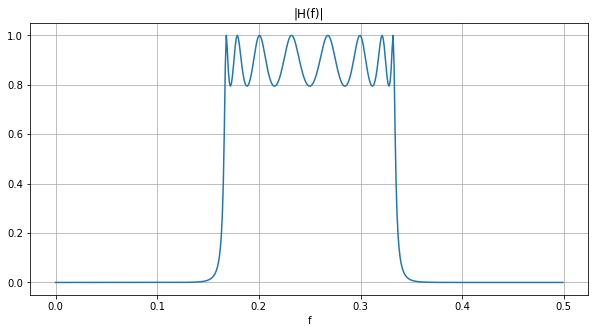

In [11]:
w,H=signal.freqz(B,A,512)#512 es el número de puntos de la gráfica
f=w/math.pi/2.0

_=plt.plot(f,np.abs(H))
_=plt.grid()
_=plt.title('|H(f)|')
_=plt.xlabel('f')

Como puede observarse es un filtro paso-banda

## Determinar límite de la banda de paso
Determinar el intervalo de frecuencias donde la atenuación es menor a 3 dB.

In [7]:
atenuacion = -20 * np.log10(np.abs(H))

In [8]:
ind_bpaso=np.argwhere(atenuacion < 3)

In [9]:
fmin = f[np.min(ind_bpaso)]
fmax = f[np.max(ind_bpaso)]

print('fmin_bpaso=',fmin)
print('fmax_bpaso=',fmax)

fmin_bpaso= 0.1669921875
fmax_bpaso= 0.33300781249999994


### Comprobación
Compruebe que los valores numéricos obtenidos coinciden con los de la gráfica. Recuerde que 3dB de atenuación corresponden con un valor del módulo de la respuesta en frecuencia de $1/\sqrt{2} \approx 0.7$

## Determinar límites de la banda atenuada
Determinar el intervalo de frecuencias donde la atenuación es mayor de 50 dB

In [13]:
ind_aten=np.argwhere(atenuacion < 50)

In [14]:
fmin = f[np.min(ind_aten)]
fmax = f[np.max(ind_aten)]

In [15]:
print('fmin_baten=',fmin)
print('fmax_baten=',fmax)

fmin_baten= 0.1435546875
fmax_baten= 0.3564453125
